In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import r2_score

In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet

In [ ]:


plt.style.use("ggplot")

df0 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("CONVENIENT_global_deaths.csv")

In [ ]:
df0.iloc[0][1]

<ipython-input-35-a826663f77ce>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



nan

In [ ]:

world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = df0.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"]=cases


country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent=pd.read_csv("continents2.csv")
continent["name"]=continent["name"].str.upper()

In [ ]:
continent


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,ÅLAND ISLANDS,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,ALBANIA,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,ALGERIA,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,AMERICAN SAMOA,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,WALLIS AND FUTUNA,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,WESTERN SAHARA,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,YEMEN,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,ZAMBIA,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [ ]:
continent[continent["name"]=="AFGHANISTAN"]["alpha-3"].values[0]

'AFG'

In [ ]:
world

,Country,Cases,Cases Range,Alpha3
0,Afghanistan,209451.0,200Kto800K,AFG
1,Albania,334457.0,200Kto800K,ALB
2,Algeria,271496.0,200Kto800K,DZA
3,Andorra,47890.0,U50K,AND
4,Angola,105288.0,50Kto200K,AGO
...,...,...,...,...
195,West Bank and Gaza,703228.0,200Kto800K,NaN
196,Winter Olympics 2022,535.0,U50K,NaN
197,Yemen,11945.0,U50K,YEM
198,Zambia,343135.0,200Kto800K,ZMB


In [ ]:
# Create Choropleth Map
fig = px.choropleth(world.dropna(),
                    locations="Alpha3",
                    color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["#ffedea", "#ffcccb", "#ff9999", "#ff6666", "#ff3333"],
                    hover_name="Country",         # Show country name on hover
                    title="COVID-19 Cases by Country", # Title for the map
                    labels={"Cases Range": "Cases Range"} # Label for legend
                   )

# Update geographic and layout settings
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    margin={"r":0, "t":50, "l":0, "b":0}, # Adjust top margin for title
    title_font=dict(size=24),              # Title font size
    legend_title_font=dict(size=18),       # Legend title font size
    legend_font=dict(size=14),               # Legend font size
    width=1200,                             # Set width of the figure
    height=600
)

# Show the map
fig.show()

In [ ]:
df0

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [ ]:
df0

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [ ]:
df0.iloc[:,1:]

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,0.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [ ]:
df0.iloc[:,1]

,Afghanistan
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1138,21.0
1139,16.0
1140,30.0
1141,15.0


<ipython-input-82-3b40aa8f3885>:26: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



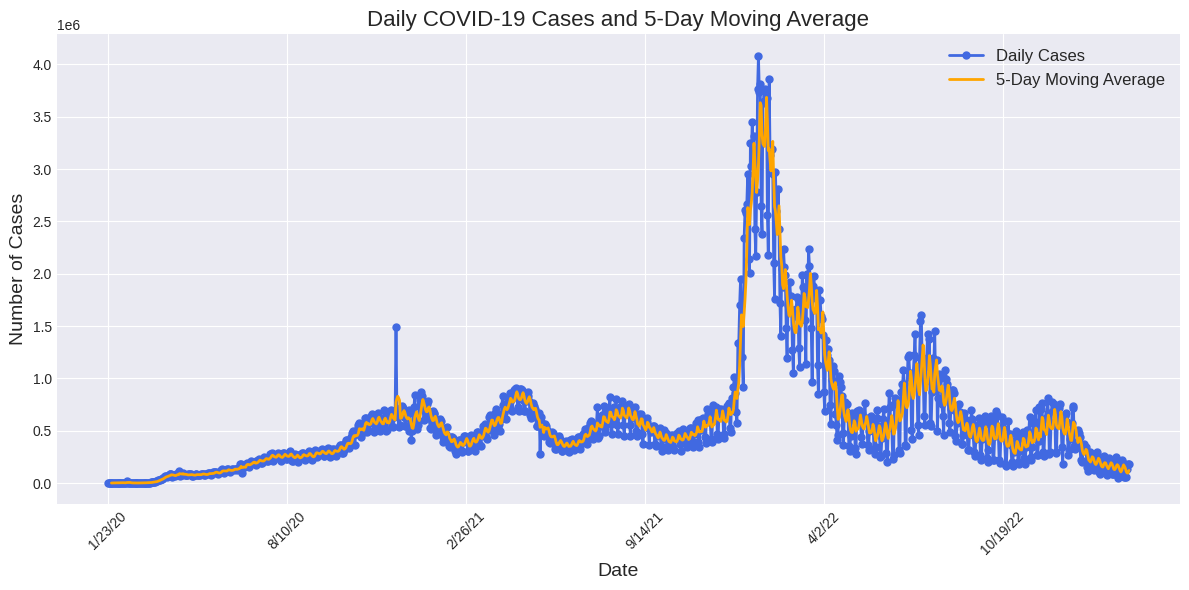

In [ ]:

# Sample DataFrame creation (You should replace this with your actual DataFrame)
# df0 and df1 should already be defined based on your earlier context

# Calculate daily cases
count = []
for i in range(1, len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i, 1:].values)))

# Create DataFrame for cases
df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df = df.set_index("Date")

# Calculate daily deaths
count = []
for i in range(1, len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i, 1:].values)))

df["Deaths"] = count

# Set the figure size and style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-darkgrid')

# Plot daily cases with custom color and marker
df.Cases.plot(title="Daily COVID-19 Cases in the World",
               marker='o',
               color='royalblue',
               markersize=5,
               linewidth=2,
               label="Daily Cases")

# Plot 5-day moving average with custom color and linestyle
df.Cases.rolling(window=5).mean().plot(color='orange',
                                         linewidth=2,
                                         label="5-Day Moving Average")

# Add titles and labels
plt.title("Daily COVID-19 Cases and 5-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(fontsize=12)

# Add a grid for better readability
plt.grid(visible=True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [ ]:
df

,Cases,Deaths
Date,,
1/23/20,100.0,1.0
1/24/20,287.0,8.0
1/25/20,493.0,16.0
1/26/20,683.0,14.0
1/27/20,809.0,26.0
...,...,...
3/5/23,56126.0,148.0
3/6/23,58040.0,366.0
3/7/23,130437.0,923.0


<ipython-input-83-a85ab618fe4b>:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



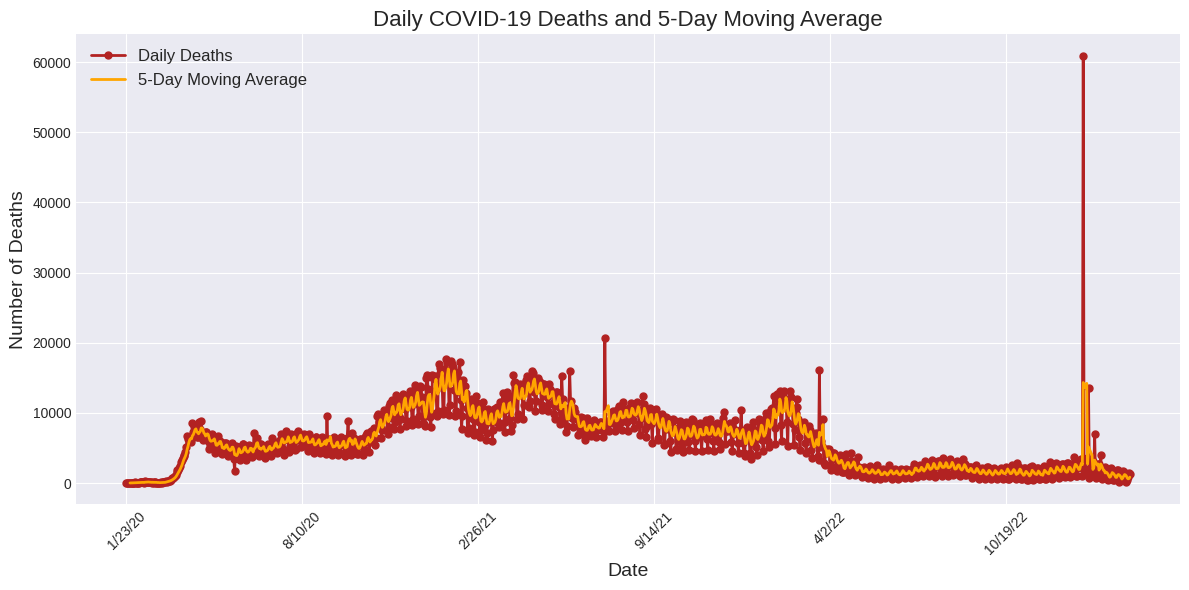

In [ ]:
# Set the figure size and style
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-darkgrid')

# Plot daily deaths with custom color and marker
df.Deaths.plot(title="Daily COVID-19 Deaths in the World",
                marker='o',
                color='firebrick',
                markersize=5,
                linewidth=2,
                label="Daily Deaths")

# Plot 5-day moving average with custom color and linestyle
df.Deaths.rolling(window=5).mean().plot(color='orange',
                                          linewidth=2,
                                          label="5-Day Moving Average")

# Add titles and labels
plt.title("Daily COVID-19 Deaths and 5-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(fontsize=12)

# Add a grid for better readability
plt.grid(visible=True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

In [ ]:
df.iloc[:,0]

,Cases
Date,
1/23/20,100.0
1/24/20,287.0
1/25/20,493.0
1/26/20,683.0
1/27/20,809.0
...,...
3/5/23,56126.0
3/6/23,58040.0
3/7/23,130437.0


<ipython-input-95-a0214e54f938>:21: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5hbq2na/y317i6q9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl5hbq2na/on71s9wv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3675', 'data', 'file=/tmp/tmpl5hbq2na/y317i6q9.json', 'init=/tmp/tmpl5hbq2na/on71s9wv.json', 'output', 'file=/tmp/tmpl5hbq2na/prophet_model7_7w6p_o/prophet_model-20241005102458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0        35767.009926
1        12887.278353
2      -168620.389468
3      -240885.305177
4       -60423.607512
            ...      
1167    157109.406946
1168    192236.571234
1169    188010.382971
1170    160975.218506
1171    -24687.882208
Name: yhat, Length: 1172, dtype: float64
R^2 Value: 0.6850


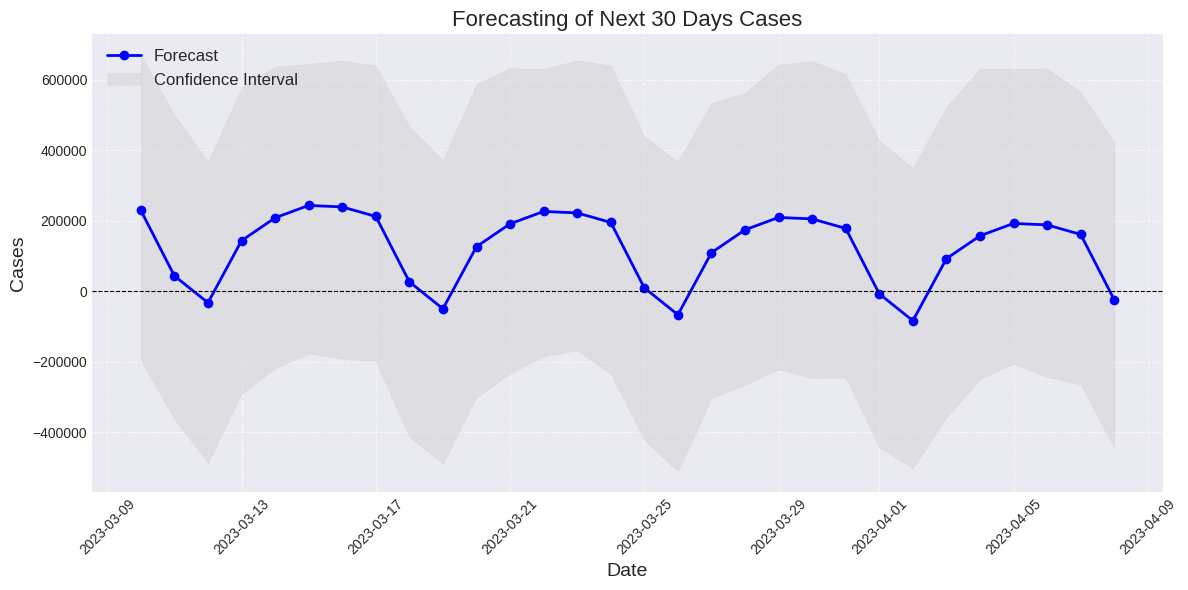

In [ ]:
class Fbprophet(object):
    def fit(self, data):
        self.data = data
        self.model = Prophet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=False)
        self.model.fit(self.data)

    def forecast(self, periods, freq):
        self.future = self.model.make_future_dataframe(periods=periods, freq=freq)
        self.df_forecast = self.model.predict(self.future)

    def plot(self, xlabel="Years", ylabel="Values"):
        self.model.plot(self.df_forecast, xlabel=xlabel, ylabel=ylabel, figsize=(12, 6))  # Increased figure size
        self.model.plot_components(self.df_forecast, figsize=(12, 8))

    def R2(self):
        print(self.df_forecast.yhat)
        return r2_score(self.data.y, self.df_forecast.yhat[:len(self.data)])

# Prepare data for model
df_fb = pd.DataFrame({"ds": [], "y": []})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"] = df.iloc[:, 0].values

# Initialize and fit the model
model = Fbprophet()
model.fit(df_fb)

# Forecast for the next 30 days
model.forecast(30, "D")
r2_value = model.R2()
print(f"R^2 Value: {r2_value:.4f}")  # Print R² value

# Prepare forecast for plotting
forecast = model.df_forecast[["ds", "yhat_lower", "yhat_upper", "yhat"]].tail(30).reset_index().set_index("ds").drop("index", axis=1)

# Plotting the forecast with improved aesthetics
plt.figure(figsize=(12, 6))
plt.plot(forecast.index, forecast["yhat"], marker="o", color="blue", label="Forecast", linewidth=2)  # Changed marker and color
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"], color="lightgray", alpha=0.5, label="Confidence Interval")  # Changed color
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a baseline at y=0
plt.title("Forecasting of Next 30 Days Cases", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cases", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)  # Add grid lines
plt.legend(loc="upper left", fontsize=12)  # Style the legend
plt.tight_layout()  # Adjust layout
plt.show()
